In [1]:
import pandas as pd
from numpy import mean
from numpy import std
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score

In [2]:
df = pd.read_csv("../Downloads/ritesh.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
print('Landslides are', round(df['y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('No Landslides are', round(df['y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

Landslides are 0.95 % of the dataset
No Landslides are 99.05 % of the dataset


In [3]:
df = df.sample(frac=1)
Lslide = df.loc[df['y'] == 1]
no_lslide = df.loc[df['y'] == 0][:300000]
normal_distributed_df = pd.concat([Lslide, no_lslide])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
X = new_df.drop('y', axis=1)
y = new_df['y']

In [4]:
def get_models():
    models, names = list(), list()
    # RandomOverSampler 
    models.append(RandomOverSampler()) 
    names.append('ROS')
    # SMOTE
    models.append(SMOTE()) 
    names.append('SMOTE')
    # BorderlineSMOTE 
    models.append(BorderlineSMOTE())
    names.append('BLSMOTE')
    # SVMSMOTE 
    models.append(SVMSMOTE()) 
    names.append('SVMSMOTE')
    # ADASYN
    models.append(ADASYN()) 
    names.append('ADASYN')
    models.append(SMOTETomek()) 
    names.append('SMOTETomek')
     
    return models, names

In [5]:
from sklearn.metrics import make_scorer
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=7, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(geometric_mean_score)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=17)
  return scores

In [6]:

models, names = get_models() 
results = list()
# define the pipeline steps
for i in range(len(models)):
    # define the model
    model = RandomForestClassifier(n_estimators=1000,n_jobs=12)
    # define the pipeline steps
    steps = [('s', MinMaxScaler()), ('o', models[i]), ('m', model)] # define the pipeline
    pipeline = Pipeline(steps=steps)
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results

>ROS 0.906 (0.004)
>SMOTE 0.936 (0.003)


In [ ]:
from matplotlib import pyplot

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

c:\Users\2020CEZ8302\anaconda3\lib\site-packages\proplot\__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


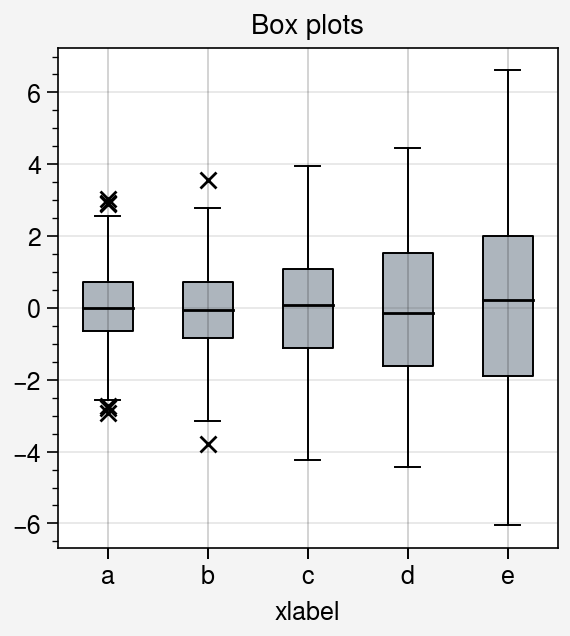

In [1]:
import proplot as plot
import numpy as np
import pandas as pd
N = 500
state = np.random.RandomState(51423)
f, axs = plot.subplots(ncols=1)
data = state.normal(size=(N, 5)) + 2*(state.rand(N, 5)-0.5)*np.arange(5)
data = pd.DataFrame(data, columns=pd.Index(
    ['a', 'b', 'c', 'd', 'e'], name='xlabel'))
ax = axs[0]
boxprops={'color':'C0'}
labels=data.columns
obj1 = ax.boxplot(data, lw=0.7, marker='x', fillcolor='gray5',
                  medianlw=1, mediancolor='k')
ax.format(title='Box plots')

In [ ]:
data

xlabel,a,b,c,d,e
0,-0.613555,0.682797,0.922802,2.712688,0.332775
1,0.914384,0.266436,-1.576431,2.764987,-0.224940
2,0.502818,0.014872,0.858294,-2.078291,1.971858
3,0.353395,1.489007,3.775098,1.625966,-3.805613
4,0.569091,-1.256706,0.251128,1.796257,-1.186086
...,...,...,...,...,...
495,0.728050,1.285810,-0.659133,1.014121,3.038811
496,0.044665,-1.075686,1.459919,2.106872,5.065045
497,0.059118,-0.620517,-1.272589,-1.066364,-2.592830
498,-1.656022,-0.385707,-2.473468,-1.206205,0.350170
